# Intelligent Agents: Reflex Agents for the Vacuum-cleaner World


## Instructions

Total Points: undergrad 10, graduate students 11

Complete this notebook and submit it. The notebook needs to be a complete project report with 

* your implementation (you can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or search algorithms),
* documentation including a short discussion of how your implementation works and your design choices, and
* experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. 

Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square is cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1451]:
import numpy as np
import collections

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [1452]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'suck'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [1453]:
def random_make_enviroment(agent, size1, size2, max_steps):
    total_steps = 0
    movement = {"north": [0, 1], "east": [1, 0],
                "south": [0, -1], "west": [-1, 0]}
    bumpers = {"north": False, "east": False, "south": False, "west": False}
    dirty = True
    room = np.random.choice([0, 1], size=(size1, size2), p=[.80, .20])
    room = np.pad(room, pad_width=1, constant_values=2)
    poistion_x = np.random.randint(1, size1+1)
    position_y = np.random.randint(1, size2+1)
    while room[poistion_x, position_y] == 2:
        poistion_x = np.random.randint(1, size1+1)
        position_y = np.random.randint(1, size2+1)
    position = [poistion_x, position_y]
    while 1 in room:
        option = agent(bumpers,dirty)
        if option == "suck":
            room[tuple(position)] = 0
            total_steps = total_steps + 1
        else:
            if((position[0] >= size1+1) or (position[1] >= size2+1) or (position[1] < 0) or (position[1] < 0)):
                position = np.add(position,movement[option])
            total_steps = total_steps + 1

        if total_steps == max_steps:
            break
    return total_steps
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [1454]:
random_make_enviroment(simple_randomized_agent,5,5,10000)

10000

# Tasks

_Submission Instructions:_ Use this notebook to prepare your submission. Complete this section with your code and results. You can add additional Markdown blocks for your description, comments in the code and use mathplotlib to produce charts. 

_Note:_ Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design. 


## Task 1: Implement a simulation environment [2 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty.
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment needs to work with the simple randomized agent program from above and then it can be used for your agent implementation in the tasks below.

In [1455]:
def make_enviroment(agent, size1, size2, max_steps):
    total_steps = 0
    movement = {"north": [0, 1], "east": [1, 0],
                "south": [0, -1], "west": [-1, 0]}
    bumpers = {"north": False, "east": False, "south": False, "west": False}
    dirty = True
    room = np.random.choice([0, 1, 2], size=(size1, size2), p=[.70, .20, .10])
    room = np.pad(room, pad_width=1, constant_values=2)
    poistion_x = np.random.randint(1, size1+1)
    position_y = np.random.randint(1, size2+1)
    while room[poistion_x, position_y] == 2:
        poistion_x = np.random.randint(1, size1+1)
        position_y = np.random.randint(1, size2+1)
    position = [poistion_x, position_y]
    while 1 in room:
        if (room[tuple(np.add(position,movement["north"]))] == 2):
            bumpers["north"] = True
        else:
            bumpers["north"] = False
        if (room[tuple(np.add(position,movement["east"]))] == 2):
            bumpers["east"] = True
        else:
            bumpers["east"] = False
        if (room[tuple(np.add(position,movement["south"]))] == 2):
            bumpers["south"] = True
        else:
            bumpers["south"] = False
        if (room[tuple(np.add(position,movement["west"]))] == 2):
            bumpers["west"] = True
        else:
            bumpers["west"] = False
        
        if(room[tuple(position)] == 1):
            dirty = True
        else:
            dirty = False
        
        option = agent(bumpers,dirty)
        if option == "suck":
            room[tuple(position)] = 0
            total_steps = total_steps + 1
        else:
            position = np.add(position,movement[option])
            total_steps = total_steps + 1

        if total_steps == max_steps:
            break
    return total_steps

## Task 2:  Implement a simple reflex agent [1 Point] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [1456]:
def simple_reflex_angent(bumpers,dirty):
    if dirty:
        return 'suck' 
    else:
        options = [x for x, state in bumpers.items() if not state]
        return np.random.choice(options)

In [1515]:
make_enviroment(simple_reflex_angent,10,10,500)

500

## Task 3: Implement a model-based reflex agent [3 Point]

This agent keeps track of the location and remembers where it has cleaned. Assume the agent knows how many squares the room has. It can move to a corner to determine its location and then is able to use more advanced navigation.

Describe how you define the __agent state__ and how your agent works before implementing it. _Note on implementing the state in Python:_ [Examples](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb)

In [1458]:
# Your short description of the state and your implementation goes here

In [1459]:
def make_enviroment_model(agent, size1, size2, max_steps):
    total_steps = 0
    path_position_list = []
    movement = {"north": [0, 1], "east": [1, 0],
                "south": [0, -1], "west": [-1, 0]}
    bumpers = {"north": False, "east": False, "south": False, "west": False}
    dirty = True
    room = np.random.choice([0, 1], size=(size1, size2), p=[.90, .10])
    room = np.pad(room, pad_width=1, constant_values=2)
    poistion_x = np.random.randint(1, size1+1)
    position_y = np.random.randint(1, size2+1)
    while room[poistion_x, position_y] == 2:
        poistion_x = np.random.randint(1, size1+1)
        position_y = np.random.randint(1, size2+1)
    position = [poistion_x, position_y]
    path_position_list.append(position)
    while 1 in room:
        if (room[tuple(np.add(position,movement["north"]))] == 2) or (room[tuple(np.add(position,movement["north"]))] == 3) :
            bumpers["north"] = True
        else:
            bumpers["north"] = False
        if (room[tuple(np.add(position,movement["east"]))] == 2) or (room[tuple(np.add(position,movement["east"]))] == 3):
            bumpers["east"] = True
        else:
            bumpers["east"] = False
        if (room[tuple(np.add(position,movement["south"]))] == 2) or (room[tuple(np.add(position,movement["south"]))] == 3):
            bumpers["south"] = True
        else:
            bumpers["south"] = False
        if (room[tuple(np.add(position,movement["west"]))] == 2) or (room[tuple(np.add(position,movement["west"]))] == 3) :
            bumpers["west"] = True
        else:
            bumpers["west"] = False
        
        if(room[tuple(position)] == 1):
            dirty = True
        else:
            dirty = False
        
        option = agent(bumpers,dirty)
        if option == "suck":
            room[tuple(position)] = 0
            total_steps = total_steps + 1
        if (option == "north") or (option == "south") or (option == "east") or (option == "west"):
            room[tuple(position)] = 3
            position = np.add(position,movement[option])
            room[tuple(position)] = 3
            # print(room)
            total_steps = total_steps + 1
        if total_steps == max_steps:
            break
    return total_steps
     

In [1460]:
# Your code goes here
conner = False
def model_reflex_angent(bumpers,dirty):
    global conner
    if dirty:
        return 'suck' 
    else:
        if(conner == True):
            if(bumpers["south"] == False):
                return "south"
            elif(bumpers["east"] == False):
                return "east"
            elif(bumpers["west"] == False):
                return "west"
            elif(bumpers["north"] == False):
                return "north"

        if(conner == False):
            if((bumpers['west'] == True) and (bumpers['north'] == True)):
                conner = True
            elif(bumpers["north"] == False):
                return 'north'
            elif(bumpers["west"] == False):
                return 'west'
            # print(bumpers)
        


In [1507]:
make_enviroment_model(model_reflex_angent,5,5,500)

21

## Task 4: Simulation study [3 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results in a suitable format (tables, graphs) and discuss the differences. 

Here is some help with [charts and tables.](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb)

In [1488]:
import matplotlib.pyplot as plt

In [1521]:
randon_angent = []
simple_reflex = []
modle_based = []


In [1580]:
randon_angent_10 = []
simple_reflex_10 = []
modle_based_10 = []

In [1633]:
randon_angent_100 = []
simple_reflex_100 = []
modle_based_100 = []

In [1634]:
# Your code goes here
for x in range(0,100):
    num = random_make_enviroment(simple_randomized_agent,10,10,1000)
    randon_angent_100.append(num)


In [1635]:
for x in range(0,100):
    num = make_enviroment(simple_reflex_angent,10,10,1000)
    simple_reflex_100.append(num)

In [1689]:
for x in range(0,100):
    num = make_enviroment_model(model_reflex_angent,10,10,1000)
    modle_based_100.append(num)

103

Text(0.5, 1.0, 'Random Based 5X5')

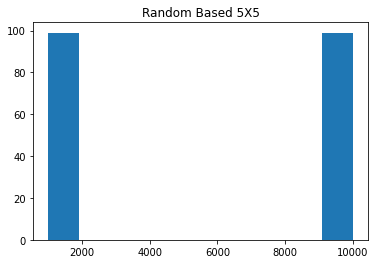

In [1690]:
plt.hist(randon_angent)
plt.title("Random Based 5X5")

Text(0.5, 1.0, 'Simple Relfex 5X5')

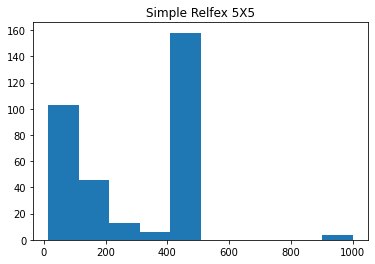

In [1691]:
plt.hist(simple_reflex)
plt.title("Simple Relfex 5X5")

Text(0.5, 1.0, 'Model Based 5X5')

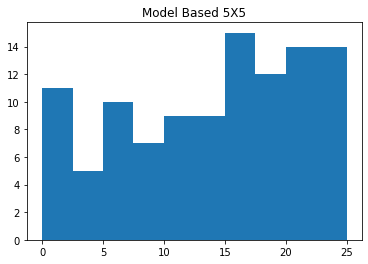

In [1692]:
plt.hist(modle_based)
plt.title("Model Based 5X5")

Text(0.5, 1.0, 'Random Based 10X10')

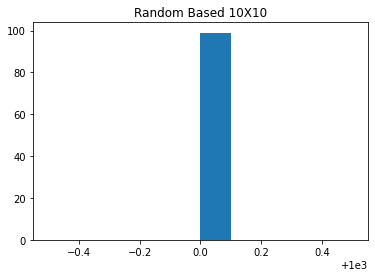

In [1693]:
plt.hist(randon_angent_10)
plt.title("Random Based 10X10")

Text(0.5, 1.0, 'Simple Reflex 10X10')

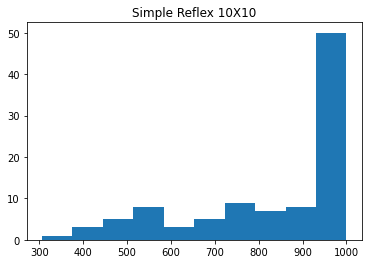

In [1694]:
plt.hist(simple_reflex_10)
plt.title("Simple Reflex 10X10")

Text(0.5, 1.0, 'Model Based 10X10')

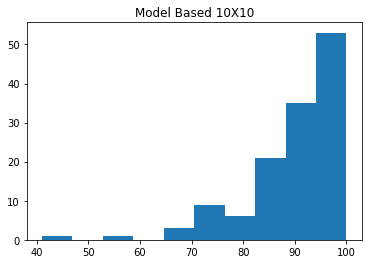

In [1695]:
plt.hist(modle_based_10)
plt.title("Model Based 10X10")

Text(0.5, 1.0, 'Random Based 100X100')

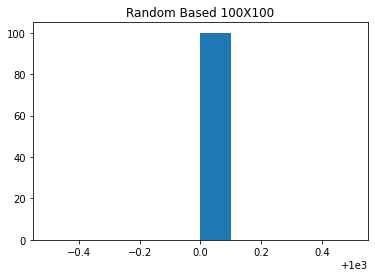

In [1696]:
plt.hist(randon_angent_100)
plt.title("Random Based 100X100")

Text(0.5, 1.0, 'Simple Reflex 100X100')

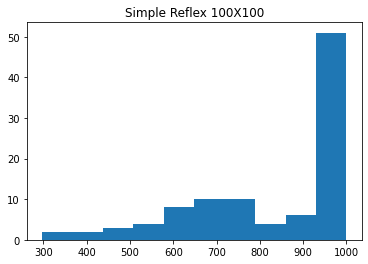

In [1697]:
plt.hist(simple_reflex_100)
plt.title("Simple Reflex 100X100")

Text(0.5, 1.0, 'Model Based 100X100')

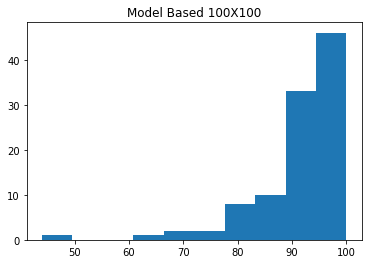

In [1698]:
plt.hist(modle_based_100)
plt.title("Model Based 100X100")

In [1578]:
ran_agent = (sum(randon_angent)/len(randon_angent))
sim_ref = (sum(simple_reflex)/len(simple_reflex))
mod_ag = sum(modle_based)/len(modle_based)
print(ran_agent,sim_ref,mod_ag)

5500.0 308.6878787878788 13.764150943396226


In [1632]:
ran_agent = (sum(randon_angent_10)/len(randon_angent_10))
sim_ref = (sum(simple_reflex_10)/len(simple_reflex_10))
mod_ag = sum(modle_based_10)/len(modle_based_10)
print(ran_agent,sim_ref,mod_ag)

1000.0 841.2222222222222 90.27906976744185


In [1699]:
ran_agent = (sum(randon_angent_100)/len(randon_angent_100))
sim_ref = (sum(simple_reflex_100)/len(simple_reflex_100))
mod_ag = sum(modle_based_100)/len(modle_based_100)
print(ran_agent,sim_ref,mod_ag)

1000.0 840.72 91.45631067961165


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |5500|308.69|13.76|
| 10x10   |1000|841.22|90.27|
| 100x100 |1000|840.72|91.45|

As seen from the data above the model based reflex agent preforms much better then the simple agent. Although as the size gets larger there is not a very dramtic increase in efficiency. The random agent did not perform well at all and often just maxed out. It rarely finished cleaning without maxing out of max_steps. On the other hand the model based reflex agent was able to clean the whole room in a significantly fewer amount of steps. I was reluctant to plot the randomize agent because it always hit the max but I did so anyway. Due to just the nature of the agent not reacting to percept and picking a random action it performed pitifully. As for the reflex agent it maxed out 99% less often then the randomized agent. Although it was also incredibly inificent at cleaning the room it finished before before hitting max steps. 
 
 
If you look at the average model base steps vs the average reflex based steps you can see that it is also significantly less and it was significantly more efficient then the reflex.  


## Task 5: Robustness of the agent implementations [1 Point] 

Describe how your agent implementations will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

1.For my reflex agent it will work because it finishes cleaning a room by picking a random action until all dirty square are cleaned. 
This also applies to my model based agent. The size of the room does not matter it will spiral around the room until all dirty square are accordingly taken care of and cleaned. 

2.When it comes to having a irregular shape the reflex agent would preform fine. Might not be efficient but it will eventually get the job done. This is of course because it will not stop choosing a random direction until all dirty squares are cleaned. Although when it comes to the model based agent a hallway would create issues due to the spiralling nature of the model based agent it could potentially run into itself and implode. It just would not perform well in that scenario. I would have to implement cross movement to get it to work properly.

3.The reflex agent would perform well in a room with obstacles. It just would not move were obstacle are and randomly select any other square to move to and do so until all dirty square are taken care of. For the model based agent this would not work with the current logic. A obstacle could create a error were it moves into a path or square that it had already visited so therefore would not work. Cross movement would have to be implemented for it to have to work properly. 

## Graduate student advanced task: Obstacles [1 Point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+1 Bonus point].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

Please forgive me for not doing this I mismanaged my time. I will not let you down on the next assignment. :)

In [ ]:
# Your code and discussion goes here

## More advanced tasks to think about

You can think about these:

* __Unknown environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square.

* __Utility-based agent:__ Change the environment, so each square has a fixed probability of getting dirty again. We assume the agent has learned this information over time. For the implementation, we give this information to the agent as a 2-dimensional array of probabilities  Cleaning one dirty square produces a utility of 1. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 10000 time steps. This is very tricky!

In [ ]:
# Your ideas/code